In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Load Dataset

In [2]:
with open('./data/url_list.txt') as f:
    lines = f.readlines()
    
print('Total Records:\t', len(lines))

Total Records:	 77677


In [3]:
def parse_search(lines):
    """ function to parse user's search history """
    length = len(lines)
    names = ['checkin', 'checkout', 'customMinimumPriceFilter', 
             'customMaximumPriceFilter', 'freeCancellation', 'stars_5', 
             'stars_4', 'stars_3', 'stars_2', 'stars_1', 'max_score', 
             'min_score', 'couponCode', 'adults', 'city', 'children', 
             'amenities', 'search_page']
    
    maps = {}
    for name in names:
        maps[name] = [np.nan] * length
      
    for i in range(length):
        line = lines[i]
        items = line[50:].strip().split('&')
        visited = set()
        for item in items:
            key, value = item.strip().split('=')
            key = key.strip().split('.')[1]
            if key == 'city':
                value = value.strip().replace('+', ' ')
            if key not in visited:
                maps[key][i] = value
                visited.add(key)
            else:
                maps[key][i] = maps[key][i] + ', ' + value
            
    # transform into DataFrame
    df = pd.DataFrame(maps, columns=names)
    df['checkin'] = pd.to_datetime(df['checkin'])
    df['checkout'] = pd.to_datetime(df['checkout'])
    df = df.rename(columns={'customMinimumPriceFilter': 'MinPrice', 
                            'customMaximumPriceFilter': 'MaxPrice'})
    
    return df

In [4]:
# parse all the data
data = parse_search(lines)
data.head()

,checkin,checkout,MinPrice,MaxPrice,freeCancellation,stars_5,stars_4,stars_3,stars_2,stars_1,max_score,min_score,couponCode,adults,city,children,amenities,search_page
0,2015-09-19,2015-09-20,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,4,NaN,3,"New York, NY, United States",NaN,NaN,1
1,2015-09-14,2015-09-15,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,4,NaN,3,"London, United Kingdom",NaN,NaN,1
2,2015-09-26,2015-09-27,NaN,175,NaN,NaN,yes,NaN,NaN,NaN,NaN,5,NaN,2,"New York, NY, United States",NaN,NaN,1
3,2015-09-02,2015-09-03,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,4,NaN,1,"Hong Kong, Hong Kong",NaN,NaN,1
4,2015-09-20,2015-09-29,NaN,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,3,"London, United Kingdom",NaN,NaN,1


In [5]:
# check basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77677 entries, 0 to 77676
Data columns (total 18 columns):
checkin             77677 non-null datetime64[ns]
checkout            77677 non-null datetime64[ns]
MinPrice            1270 non-null object
MaxPrice            49288 non-null object
freeCancellation    17949 non-null object
stars_5             4303 non-null object
stars_4             12704 non-null object
stars_3             14862 non-null object
stars_2             9931 non-null object
stars_1             9323 non-null object
max_score           5517 non-null object
min_score           60826 non-null object
couponCode          2221 non-null object
adults              77677 non-null object
city                77677 non-null object
children            260 non-null object
amenities           704 non-null object
search_page         77677 non-null object
dtypes: datetime64[ns](2), object(16)
memory usage: 10.7+ MB


In [6]:
# check missing values
missing = data.isnull().sum().reset_index()
missing = missing.rename(columns={'index': 'name', 0: 'missing'})
missing['ratio'] = missing['missing'] / len(data)
missing[missing['missing'] > 0]

,name,missing,ratio
2,MinPrice,76407,0.983650
3,MaxPrice,28389,0.365475
4,freeCancellation,59728,0.768928
5,stars_5,73374,0.944604
6,stars_4,64973,0.836451
7,stars_3,62815,0.808669
8,stars_2,67746,0.872150
9,stars_1,68354,0.879977
10,max_score,72160,0.928975
11,min_score,16851,0.216937


### Question 1
Create a clean data set where each column is a field in the URL, each row is a given search and the cells are the corresponding URL values.

In [7]:
data.head()

,checkin,checkout,MinPrice,MaxPrice,freeCancellation,stars_5,stars_4,stars_3,stars_2,stars_1,max_score,min_score,couponCode,adults,city,children,amenities,search_page
0,2015-09-19,2015-09-20,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,4,NaN,3,"New York, NY, United States",NaN,NaN,1
1,2015-09-14,2015-09-15,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,4,NaN,3,"London, United Kingdom",NaN,NaN,1
2,2015-09-26,2015-09-27,NaN,175,NaN,NaN,yes,NaN,NaN,NaN,NaN,5,NaN,2,"New York, NY, United States",NaN,NaN,1
3,2015-09-02,2015-09-03,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,4,NaN,1,"Hong Kong, Hong Kong",NaN,NaN,1
4,2015-09-20,2015-09-29,NaN,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,3,"London, United Kingdom",NaN,NaN,1


### Question 2
For each search query, how many amenities were selected?

In [8]:
# value counts
data['amenities'].value_counts()

internet                272
yes_smoking             170
shuttle                 111
yes_pet                  85
breakfast                39
lounge                   22
yes_smoking, yes_pet      4
breakfast, yes_pet        1
Name: amenities, dtype: int64

In [9]:
# check number of 
data['amenities_count'] = data['amenities'].apply(lambda x: 0 if pd.isnull(x) 
                                                  else len(x.split(', ')))
data['amenities_count'].value_counts()

0    76973
1      699
2        5
Name: amenities_count, dtype: int64

### Question 3
Often, to measure the quality of a search algorithm, data scientists use some metric based on how often users click on the second page, third page, and so on. The idea here is that a great search algorithm should return all interesting results on the first page and never force users to visit the other pages (how often do you click on the second page results when you search on Google? Almost never, right?).
* Create a metric based on the above idea and find the city with the worst search algorithm.

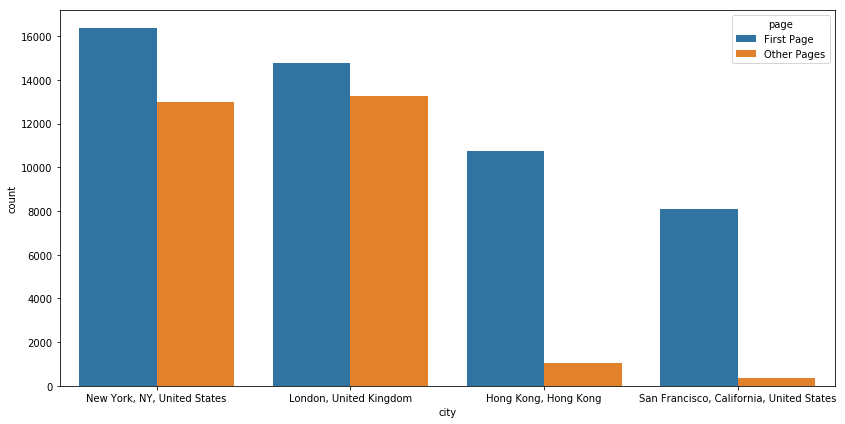

In [10]:
data['page'] = data['search_page'].apply(lambda x: 'First Page' if x == '1' else 'Other Pages')

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x='city', hue='page', data=data, ax=ax)
plt.tight_layout()
plt.show()

In [11]:
grouped = data.groupby(['city', 'page'])['checkin'].count().unstack()
grouped['ratio'] = grouped['Other Pages'] / (grouped['First Page'] + grouped['Other Pages'])

grouped

page,First Page,Other Pages,ratio
city,,,
"Hong Kong, Hong Kong",10735,1051,0.089174
"London, United Kingdom",14775,13283,0.473412
"New York, NY, United States",16385,12999,0.442384
"San Francisco, California, United States",8105,344,0.040715


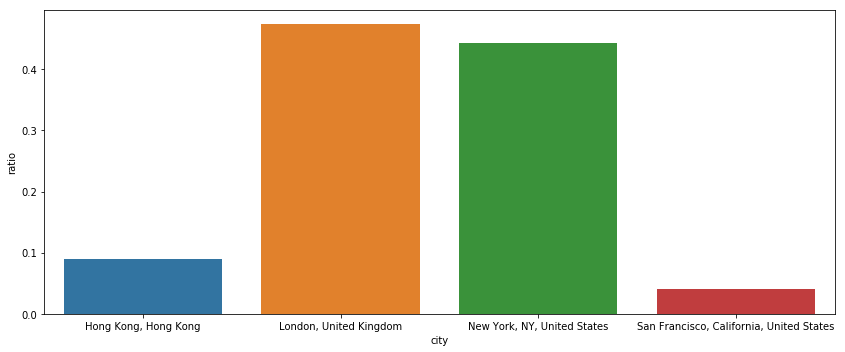

In [12]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x=grouped.index, y='ratio', data=grouped, ax=ax)
plt.tight_layout()
plt.show()

If we use the ratio of `other pages` versus `total visits`, we can see that `London` and `New York` have pretty high ratio. It's clear that `London` and `New York` have pretty bad search algorithms.